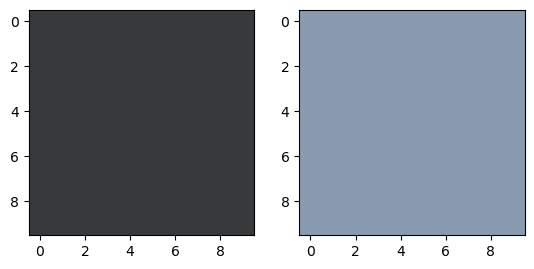

In [94]:
from shared.utils import load_img_array
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import numpy as np 
import cv2 as cv

def get_palette(src: np.ndarray, num_colors: int = 8) -> list[tuple[int, int, int]]:
    """""" 
    img_pixels: np.ndarray = src.reshape(-1, 3)
    km = KMeans(n_clusters=num_colors)
    km.fit(img_pixels)
    centers = km.cluster_centers_
    palette = sorted(centers, key=lambda v: sum(v))
    return palette, km


img = load_img_array("/home/kai/Pictures/tokyo_base/tokyo_misc.jpg")
img = img[:,:,:3]

img = cv.resize(img, (0,0), fx=0.2, fy=0.2)

num_colors = 2
palette, km = get_palette(img, num_colors)

f, axes = plt.subplots(1, num_colors)

for i in range(len(axes)):
    a = np.zeros((10, 10, 3), dtype=np.uint8)
    a[:,:,:] = palette[i]
    axes[i].imshow(a)

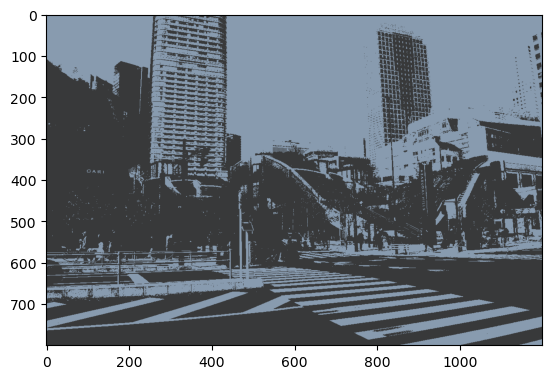

In [95]:
new = np.ones(img.reshape(-1, 3).shape, dtype=np.uint8)

for i in range(new.shape[0]):
    new[i] = km.cluster_centers_[km.labels_[i]]
plt.imshow(new.reshape(img.shape))

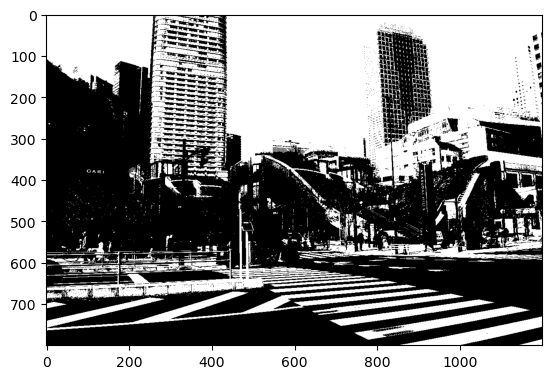

In [92]:
import cv2 as cv 

g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, t = cv.threshold(g, 0, 255, cv.THRESH_OTSU)

plt.imshow(cv.cvtColor(t, cv.COLOR_GRAY2RGB))

(80, 120)


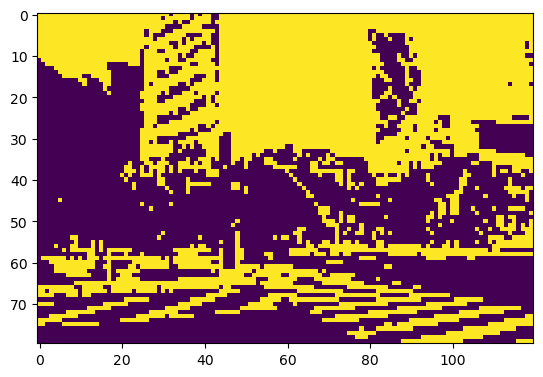

In [107]:
tiny = cv.resize(t, (0,0), fx=0.1, fy=0.1)
print(tiny.shape)
_, tiny = cv.threshold(tiny, 0, 255, cv.THRESH_OTSU)
plt.imshow(tiny)

In [96]:
from PIL import Image 

Image.fromarray(new.reshape(img.shape)).save("ok.png")

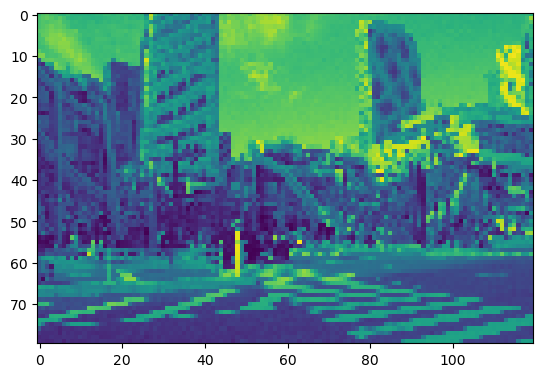

In [113]:
g2 = cv.resize(g, (0,0), fx=0.1, fy=0.1)
plt.imshow(g2)


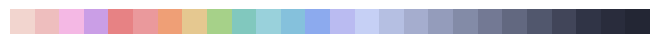

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

def plot_palette(palette: list[tuple[int, int, int]]):
    f, axes = plt.subplots(1, len(palette))
    for i in range(len(axes)):
        axes[i].set_axis_off()
        a = np.zeros((10, 10, 3), dtype=np.uint8)
        a[:,:,:] = palette[i]
        axes[i].imshow(a)
    f.tight_layout(pad=0)

plot_palette(schemes["catppuccin_frappe"])